In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [84]:
data_latex = """
                     & $R_T$ & $R_S$ & $P_D$ & ZCP               \\
Baseline             & 0.000 & 0.000 & 1.000 & $0.387 \pm 0.321$ \\
TF-Agent             & 0.000 & 0.053 & 1.000 & $0.319 \pm 0.158$ \\
OF-Agent             & 0.000 & 0.000 & 1.000 & $0.368 \pm 0.227$ \\
Permutation ($k=5$)  & 0.000 & 1.000 & 1.000 & $0.964 \pm 0.052$ \\
Mutation ($p_m=0.4$) & 0.977 & 0.805 & 0.951 & $0.985 \pm 0.036$ \\ 
Mutation ($p_m=1.0$) & 1.000 & 1.000 & 0.384 & $0.488 \pm 0.026$ \\
"""

In [81]:
rows = data_latex.replace('\\', '').split('\n')

def parse(x):
    try:
        return [float(x.strip())]
    except:
        pass
    try:
        return [float(x_) for x_ in x.strip().replace('$', '').split('pm')]
    except:
        return [x.strip()]
    
data = [[x_ for x in row.split('&') for x_ in parse(x)] for row in rows[1:-1]]
data[0][0] = 'Experiment'
data[0][-1] = 'ZCP'
data[0].append('ZCP_std')
df = pd.DataFrame(data[1:], columns=data[0])
df

,Experiment,$R_T$,$R_S$,$P_D$,ZCP,ZCP_std
0,Baseline,0.000,0.000,1.000,0.387,0.321
1,TF-Agent,0.000,0.053,1.000,0.319,0.158
2,OF-Agent,0.000,0.000,1.000,0.368,0.227
3,Permutation ($k=5$),0.000,1.000,1.000,0.964,0.052
4,Mutation ($p_m=0.4$),0.977,0.805,0.951,0.985,0.036
5,Mutation ($p_m=1.0$),1.000,1.000,0.384,0.488,0.026


In [77]:
sns.reset_defaults()
sns.set()

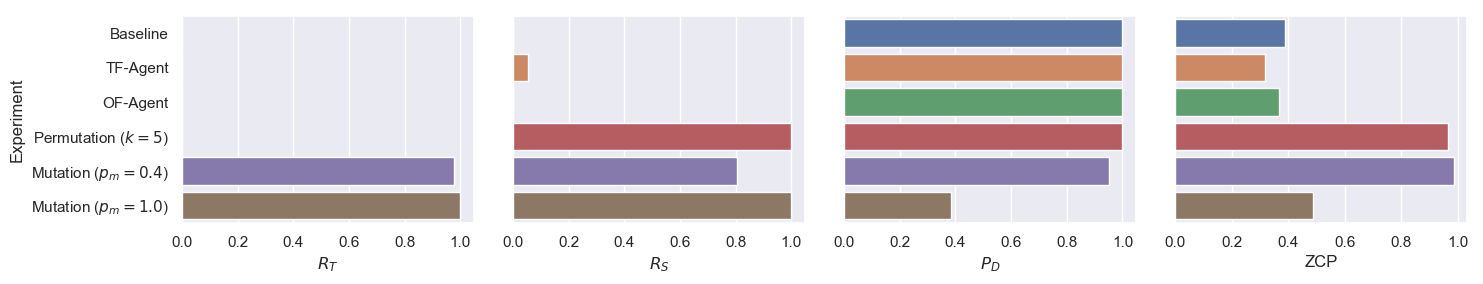

In [83]:
fig, axs = plt.subplots(1, 4, figsize=(15, 3))

for i, ax in enumerate(axs):
    sns.barplot(y='Experiment', x=df.columns[i+1], data=df, orient='h', ax=ax)
    if i > 0:
        ax.set_yticks([]); ax.set_ylabel('')
plt.tight_layout()